# Final Project


## TODO: Add project description here

In [1]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import cv2
import matplotlib.pyplot as plt

this_dir: str = os.path.abspath('')
assets_dir: str = os.path.join(this_dir, "..", "..", "assets", "notebooks", "project")

In [2]:
# Example component

from final_project.components import FlipImageComponent


# make figure
fig = plt.figure(figsize=(16, 9), dpi=96)

# define component
flip: FlipImageComponent = FlipImageComponent(axis=0)
flip.start()

# read image from disk
image_fpath: str = os.path.join(assets_dir, "duckietown.jpg")
image: np.ndarray = cv2.imread(image_fpath)

# plot input
subfig = fig.add_subplot(1, 2, 1)
subfig.imshow(cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA))
subfig.set_title("Input")

# feed image to component
flip.in_bgr.put(image)

# get result
image2: np.ndarray = flip.out_bgr.get()

# plot output
subfig = fig.add_subplot(1, 2, 2)
subfig.imshow(cv2.cvtColor(image2, cv2.COLOR_BGRA2RGBA))
subfig.set_title("Output")

# stop component
flip.stop()

In [12]:
## Real Duckiebot - KIZZY

import os
from duckietown.types import CameraParameters

# TODO: change this to the name of your Duckiebot
VEHICLE_NAME: str = "kizzy"


# TODO: change this to your duckiebot's camera parameters
CAMERA_PARAMETERS: CameraParameters = {
    "width": 640,
    "height": 480,
    "K": np.reshape(
        [
            275.73276038498926,
            0.0,
            319.6766909474663,
            0.0,
            280.1548497747509,
            273.2555774703665,
            0.0,
            0.0,
            1.0,
        ],
        (3, 3),
    ),
    "D": [
        -0.186769174617111,
        0.021237828783060932,
        -0.010063453683894804,
        0.0020176247114933833,
        0.0,
    ],
    "P": np.reshape(
        [
            181.33279418945312,
            0.0,
            321.308646777532,
            0.0,
            0.0,
            230.59254455566406,
            277.2216409396642,
            0.0,
            0.0,
            0.0,
            1.0,
            0.0,
        ],
        (3, 4),
    ),
    "H": np.reshape(
        [
            8.56148231e-03,
            2.22480148e-01,
            4.24318934e-01,
            -5.67022044e-01,
            -1.13258040e-03,
            6.81113839e-04,
            5.80917161e-02,
            4.35079347e00,
            1.0,
        ],
        (3, 3),
    ),
}


## Duckiematrix only
# import os
# os.environ["DUCKIEMATRIX_ENGINE_HOST"] = "172.17.0.1"
# VEHICLE_NAME: str = "map_0/vehicle_0"

In [ ]:
## Real Duckiebot only

import os
from duckietown.types import CameraParameters

# TODO: change this to the name of your Duckiebot
VEHICLE_NAME: str = "db21j3"

# TODO: change this to your duckiebot's camera parameters
CAMERA_PARAMETERS: CameraParameters = {
    "width": 640,
    "height": 480,
    "K": np.reshape(
        [
            295.79606866959824,
            0.0,
            321.2621599038631,
            0.0,
            299.5389048862878,
            241.73616515312332,
            0.0,
            0.0,
            1.0,
        ],
        (3, 3),
    ),
    "D": [
        -0.23543978771661125,
        0.03637781479419574,
        -0.0033069818601306755,
        -0.0012140708179525926,
        0.0,
    ],
    "P": np.reshape(
        [
            201.14027404785156,
            0.0,
            319.5586620845679,
            0.0,
            0.0,
            239.74398803710938,
            237.60151004037834,
            0.0,
            0.0,
            0.0,
            1.0,
            0.0,
        ],
        (3, 4),
    ),
    "H": np.reshape(
        [
            8.56148231e-03,
            2.22480148e-01,
            4.24318934e-01,
            -5.67022044e-01,
            -1.13258040e-03,
            6.81113839e-04,
            5.80917161e-02,
            4.35079347e00,
            1.0,
        ],
        (3, 3),
    ),
}


## Duckiematrix only
# import os
# os.environ["DUCKIEMATRIX_ENGINE_HOST"] = "172.17.0.1"
# VEHICLE_NAME: str = "map_0/vehicle_0"

In [13]:
# Sensor - Camera

from duckietown.components.duckiebot import CameraDriverComponent

camera: CameraDriverComponent = CameraDriverComponent(vehicle_name=VEHICLE_NAME)

Using ROS...


In [14]:
# Image Cropping

from duckietown.components.lane_following import ImageCropComponent

image_crop: ImageCropComponent = ImageCropComponent(parameters=CAMERA_PARAMETERS)

In [15]:
# Line Detector

from duckietown.components.lane_following import LineDetectorComponent

line_detector: LineDetectorComponent = LineDetectorComponent()

In [16]:
# Lane Filter

from duckietown.components.lane_following import LaneFilterComponent

lane_filter: LaneFilterComponent = LaneFilterComponent(camera_parameters=CAMERA_PARAMETERS)

In [17]:
# Lane Controller

from duckietown.components.lane_following import LaneControllerComponent

lane_controller: LaneControllerComponent = LaneControllerComponent()

In [18]:
# Inverse Kinematics

from duckietown.components.lane_following import InverseKinematicsComponent

inverse_kinematics: InverseKinematicsComponent = InverseKinematicsComponent()

In [19]:
# PWM Mapper

from duckietown.components.lane_following import PWMComponent

pwm: PWMComponent = PWMComponent()

In [20]:
# Wheels Driver

from duckietown.components.duckiebot import MotorsDriverComponent

motors: MotorsDriverComponent = MotorsDriverComponent(vehicle_name=VEHICLE_NAME)

Using ROS...


In [21]:
# Connect components

image_crop.in_bgr.wants(camera.out_bgr)

line_detector.in_bgr.wants(image_crop.out_bgr)

lane_filter.in_lines.wants(line_detector.out_lines)
lane_filter.in_command_time.wants(motors.out_command_time)
lane_filter.in_v_omega.wants(lane_controller.out_v_omega)

lane_controller.in_d_phi.wants(lane_filter.out_d_phi)

inverse_kinematics.in_v_omega.wants(lane_controller.out_v_omega)

pwm.in_wl_wr.wants(inverse_kinematics.out_wl_wr)

motors.in_pwml_pwmr.wants(pwm.out_pwml_pwmr)

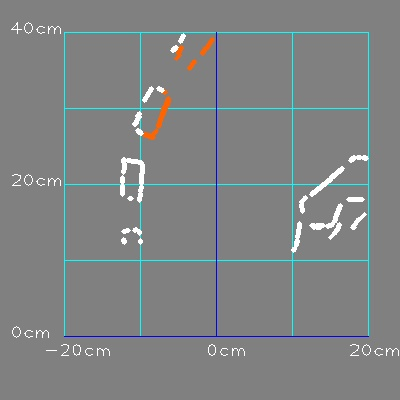

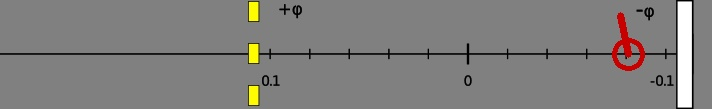

(0.2589506115968954, 0.20692406811426226)

In [26]:
# Rendering components

from duckietown.components.rendering import ImageRendererComponent, TextRendererComponent

# define components
segments: ImageRendererComponent = ImageRendererComponent()
belief: ImageRendererComponent = ImageRendererComponent()
pwm_signals: TextRendererComponent = TextRendererComponent()

# connect components
segments.in_image.wants(lane_filter.out_segments_image)
belief.in_image.wants(lane_filter.out_belief_image)
pwm_signals.in_data.wants(pwm.out_pwml_pwmr)

In [31]:
import time
from typing import List

from duckietown.components.base import Component
from duckietown.system import System

# list of components to run
components: List[Component] = [
    camera,
    image_crop,
    line_detector,
    # lane_filter,
    # lane_controller,
    # inverse_kinematics,
    # pwm,
    # motors,
    # rendering
    segments,
    belief,
    pwm_signals
]

# create system
system: System = System(components)

# run system (NOTE: this is blocking)
system.run()

[autoreload of duckietown.components.lane_following failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 292, in update_class
    if (old_obj == new_obj) is True:
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
]


[system]: System booting...
[system]: Component CameraDriverComponent@139813064206032 started!
[system]: Component ImageCropComponent@139813710453680 started!
[system]: Component LineDetectorComponent@139813064206128 started!
[system]: Component ImageRendererComponent@139813463266640 started!
[system]: Component ImageRendererComponent@139813463267168 started!
[system]: Component TextRendererComponent@139813463268272 started!
[system]: System running...
[system]: Stopping component CameraDriverComponent@139813064206032...
[system]: Stopping component ImageCropComponent@139813710453680...
[system]: Stopping component LineDetectorComponent@139813064206128...
[system]: Stopping component ImageRendererComponent@139813463266640...
[system]: Stopping component ImageRendererComponent@139813463267168...
[system]: Stopping component TextRendererComponent@139813463268272...
[system]: Waiting for component CameraDriverComponent@139813064206032...
[system]: Component CameraDriverComponent@139813064